In [1]:
import pandas as pd

df = pd.read_csv('건강검진 (1).csv')
df["Year_ID"] = df["YEAR"].astype(str) + "_" + df["ID"].astype(str)
cols = ['Year_ID'] + [col for col in df.columns if col != 'Year_ID']
df = df[cols]
df = df.drop(['ID', 'YEAR'], axis=1)
df.head()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,...,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,170,75,90.0,120,80,99,...,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017_2,1,7,11,180,80,89.0,130,82,106,...,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017_3,1,9,41,165,75,91.0,120,70,98,...,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017_4,1,11,48,175,80,91.0,145,87,95,...,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017_5,1,11,30,165,60,80.0,138,82,101,...,1,0,22.0,normal,False,pre,pre,False,False,False


 'AGE_GROUP', 'WAIST', and 'BLDS' 콜롬 확인


Data Shape: (2386513, 31)

Summary Statistics:
           AGE_GROUP         WAIST          BLDS
count  2.386513e+06  2.386513e+06  2.386513e+06
mean   1.083471e+01  8.198824e+01  1.015120e+02
std    2.791896e+00  1.069816e+01  2.390166e+01
min    5.000000e+00  1.000000e+00  0.000000e+00
25%    9.000000e+00  7.500000e+01  8.900000e+01
50%    1.100000e+01  8.200000e+01  9.700000e+01
75%    1.300000e+01  8.800000e+01  1.060000e+02
max    1.800000e+01  9.990000e+02  9.610000e+02

Missing Values:
 AGE_GROUP    0
WAIST        0
BLDS         0
dtype: int64

Missing Value Percentage:
 AGE_GROUP    0.0
WAIST        0.0
BLDS         0.0
dtype: float64

Data Types before conversion:
 AGE_GROUP      int64
WAIST        float64
BLDS           int64
dtype: object

Data Types after conversion:
 AGE_GROUP    category
WAIST         float64
BLDS            int64
dtype: object


<ipython-input-2-b17fa5b73176>:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['AGE_GROUP']):


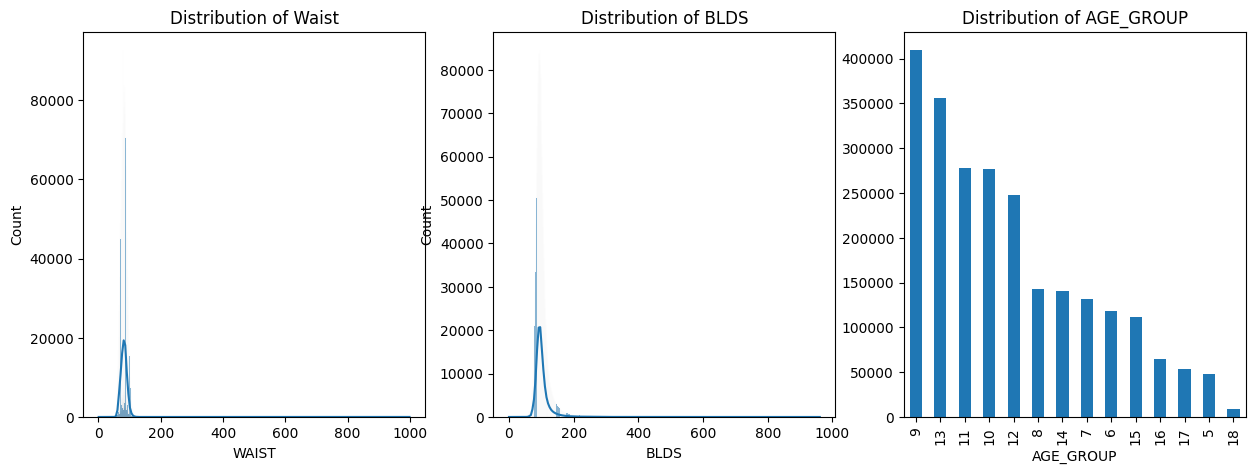


Unique Values in 'AGE_GROUP' and their frequencies:
 AGE_GROUP
9     409189
13    356439
11    277306
10    276814
12    247774
8     143022
14    140182
7     131422
6     118232
15    111166
16     64894
17     53963
5      47711
18      8399
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Shape이랑 Summary Statistics
print("Data Shape:", df.shape)
summary_stats = df[['AGE_GROUP', 'WAIST', 'BLDS']].describe()
print("\nSummary Statistics:\n", summary_stats)

# 2. 결측치
missing_values = df[['AGE_GROUP', 'WAIST', 'BLDS']].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)


# 3. 타입 확인
print("\nData Types before conversion:\n", df[['AGE_GROUP', 'WAIST', 'BLDS']].dtypes)
# Convert data types if necessary
# Convert 'AGE_GROUP' to category if not already
if not pd.api.types.is_categorical_dtype(df['AGE_GROUP']):
    df['AGE_GROUP'] = df['AGE_GROUP'].astype('category')

for col in ['WAIST', 'BLDS']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData Types after conversion:\n", df[['AGE_GROUP', 'WAIST', 'BLDS']].dtypes)

# 4. 분포 확인
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['WAIST'], kde=True)
plt.title('Distribution of Waist')

plt.subplot(1, 3, 2)
sns.histplot(df['BLDS'], kde=True)
plt.title('Distribution of BLDS')

plt.subplot(1, 3, 3)
df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title('Distribution of AGE_GROUP')
plt.show()


# 5. 'AGE_GROUP' 개수 확인
age_group_counts = df['AGE_GROUP'].value_counts()
print("\nUnique Values in 'AGE_GROUP' and their frequencies:\n", age_group_counts)

각 고유한 'AGE_GROUP'(연령대) 값마다 개별적인 DataFrame을 생성하고, 이들을 하나의 딕셔너리에 저장



In [4]:
age_group_dfs = {}
unique_age_groups = df['AGE_GROUP'].unique()

for age_group in unique_age_groups:
    age_group_dfs[age_group] = df[df['AGE_GROUP'] == age_group]

age_group_dfs에 있는 각 연령대별 DataFrame을 반복(iterate)하면서, 'WAIST'(허리둘레)와 'BLDS'(혈당)를 기준으로 K-평균(K-means) 클러스터링을 수행하고, 그 결과로 나온 클러스터 레이블을 새로운 열로 추가



In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

for age_group, df_age in age_group_dfs.items():
    # 변수 추출
    features = df_age[['WAIST', 'BLDS']]

    # 스케일링
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # K-means clustering
    kmeans = KMeans(n_clusters=2, random_state=0)
    df_age['cluster'] = kmeans.fit_predict(scaled_features)

    # df 업데이트
    age_group_dfs[age_group] = df_age

<ipython-input-5-1798b9b7d59f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['cluster'] = kmeans.fit_predict(scaled_features)
<ipython-input-5-1798b9b7d59f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['cluster'] = kmeans.fit_predict(scaled_features)
<ipython-input-5-1798b9b7d59f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

.loc를 사용하여 클러스터 레이블을 할당함으로써 SettingWithCopyWarning 경고를 해결하고, 변경 사항이 age_group_dfs 안의 원본 DataFrame에 제대로 반영



In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

for age_group, df_age in age_group_dfs.items():

    features = df_age[['WAIST', 'BLDS']]

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=2, random_state=0) #클러스터 개수 2개
    df_age.loc[:, 'cluster'] = kmeans.fit_predict(scaled_features)

    age_group_dfs[age_group] = df_age

age_group_dfs에 있는 각 연령대별 DataFrame을 반복하면서, 각 클러스터에 대해 'WAIST'(허리둘레)와 'BLDS'(혈당)의 평균을 계산하고, 질병 분포를 분석한 후 그 결과를 딕셔너리에 저장



In [7]:
import pandas as pd

results = {}

for age_group, df_age in age_group_dfs.items():
    cluster_means = df_age.groupby('cluster')[['WAIST', 'BLDS']].mean()
    results[age_group] = {}
    results[age_group]['means'] = cluster_means

    disease_cols = [col for col in df_age.columns if col.endswith('_') or col in ['DIABETES', 'HYPERTENSION']]
    for disease in disease_cols:
      results[age_group][disease] = df_age.groupby('cluster')[disease].value_counts(normalize=True)

# 멀티 인덱스 만들기
all_results = []
for age_group, data in results.items():
    means = data['means']
    for cluster in means.index:
        row = {'AGE_GROUP': age_group, 'cluster': cluster, 'WAIST': means.loc[cluster, 'WAIST'], 'BLDS': means.loc[cluster, 'BLDS']}
        for disease, proportions in data.items():
            if disease != 'means':
                try:
                    row[disease] = proportions.loc[cluster].max()
                except KeyError:
                    row[disease] = 0  # 클러스터 안에 질병이 없을 때
                except AttributeError:
                    row[disease] = proportions.loc[cluster]
        all_results.append(row)

final_df = pd.DataFrame(all_results)
final_df = final_df.set_index(['AGE_GROUP', 'cluster'])
display(final_df)

WAIST        BLDS  DIABETES  HYPERTENSION
AGE_GROUP cluster                                               
8         0        83.748892   95.459505  0.696144      0.489450
          1        97.932163  222.648829  0.994426      0.520067
7         0        79.149044   88.932160  0.948706      0.535189
          1        91.939597  107.723744  0.655246      0.573334
9         0        90.168253  106.349093  0.473989      0.542400
          1        73.566689   91.522634  0.821645      0.588211
11        0        89.194044  113.406156  0.455580      0.545450
          1        74.842626   94.321259  0.728825      0.473287
10        0        74.110647   92.894057  0.775726      0.522002
          1        89.368003  110.029563  0.447288      0.547572
12        0        75.720762   95.765746  0.680958      0.466913
          1        89.322761  115.536362  0.455802      0.552795
14        0        90.670865  117.951113  0.448461      0.549728
          1        77.981472   98.198795  0.612228      0.529443
6         0        74.393839   87.362270  0.957082      0.614628
          1        89.519802   99.837689  0.595576      0.569714
13        0        89.955888  117.024013  0.455573      0.551202
          1        76.785477   96.975283  0.643548      0.501444
5         0        88.295077   96.656870  0.703624      0.559372
          1        72.294511   87.581685  0.936126      0.639833
15        0        91.125656  117.792485  0.441614      0.535408
          1        78.457931   98.532241  0.604815      0.527446
16        0        78.492318   98.825789  0.595456      0.513951
          1        91.289560  117.482468  0.443778      0.514402
17        0        77.881144   99.064540  0.585774      0.497873
          1        91.337670  117.390500  0.446426      0.485544
18        0        75.196923   98.518172  0.608027      0.463322
          1        89.696730  115.505876  0.423863      0.461165

사용자가 입력한 현재 연령대 그룹의 각 군집에 대해, 다음 연령대 그룹에서 가장 유사한 군집을 'WAIST'와 'BLDS' 값을 기준으로 찾고, 그 두 군집 간의 'WAIST', 'BLDS', 'DIABETES', 'HYPERTENSION' 비율의 변화량을 계산하여 comparison_results 딕셔너리에 저장



In [12]:
while True:
    try:
        current_age_group = int(input("Enter your current AGE_GROUP: ")) #사용자로부터 현재 AGE_GROUP 입력 받기
        if current_age_group not in final_df.index.get_level_values('AGE_GROUP'):
            print("Invalid AGE_GROUP. Please enter a valid age group from the dataset.")
            continue
        break
    except ValueError:
        print("Invalid input. Please enter an integer.")

future_age_group = current_age_group + 1

if future_age_group not in final_df.index.get_level_values('AGE_GROUP'):
    print(f"Cannot compare with AGE_GROUP {future_age_group} due to lack of data.")
    comparison_results = None
else:
    comparison_results = {}
    for cluster in final_df.loc[current_age_group].index:
        current_waist = final_df.loc[(current_age_group, cluster), 'WAIST']
        current_blds = final_df.loc[(current_age_group, cluster), 'BLDS']

        # 미래 AGE_GROUP에서 가장 유사한 군집 찾기 (유클리드 거리 사용)
        distances = {}
        for future_cluster in final_df.loc[future_age_group].index:
            future_waist = final_df.loc[(future_age_group, future_cluster), 'WAIST']
            future_blds = final_df.loc[(future_age_group, future_cluster), 'BLDS']
            distances[future_cluster] = ((current_waist - future_waist)**2 + (current_blds - future_blds)**2)**0.5

        corresponding_future_cluster = min(distances, key=distances.get)

        comparison_results[cluster] = {
            'future_cluster': corresponding_future_cluster,
            'waist_diff': final_df.loc[(future_age_group, corresponding_future_cluster), 'WAIST'] - current_waist,
            'blds_diff': final_df.loc[(future_age_group, corresponding_future_cluster), 'BLDS'] - current_blds,
            # 질병 비율 차이 계산
        }
        for disease in ['DIABETES', 'HYPERTENSION']:
            comparison_results[cluster][disease + '_diff'] = final_df.loc[(future_age_group, corresponding_future_cluster), disease] - final_df.loc[(current_age_group, cluster), disease]

Enter your current AGE_GROUP: 10


결과 출력


In [13]:
report = f"## Health Metric Comparison Report\n\n"
report += f"**User's Current Age Group:** {current_age_group}\n"
report += f"**Projected Future Age Group (5 years later):** {future_age_group}\n\n"

for cluster, comparison in comparison_results.items():
    report += f"**Cluster {cluster} in Current Age Group:**\n"
    report += f"  * Corresponding Cluster in Future Age Group: {comparison['future_cluster']}\n"
    report += f"  * Difference in Average Waist Size: {comparison['waist_diff']:.2f} cm\n"
    report += f"  * Difference in Average Blood Sugar Levels (BLDS): {comparison['blds_diff']:.2f} mg/dL\n"
    report += f"  * Difference in Diabetes Prevalence: {comparison['DIABETES_diff']:.2f}\n"
    report += f"  * Difference in Hypertension Prevalence: {comparison['HYPERTENSION_diff']:.2f}\n\n"

report += "**Limitations:**\n"
report += "This analysis is based solely on waist circumference and blood sugar levels and the prevalence of diabetes and hypertension. It is not a comprehensive health assessment and should not be used as a substitute for professional medical advice."

print(report)

## Health Metric Comparison Report

**User's Current Age Group:** 10
**Projected Future Age Group (5 years later):** 11

**Cluster 0 in Current Age Group:**
  * Corresponding Cluster in Future Age Group: 1
  * Difference in Average Waist Size: 0.73 cm
  * Difference in Average Blood Sugar Levels (BLDS): 1.43 mg/dL
  * Difference in Diabetes Prevalence: -0.05
  * Difference in Hypertension Prevalence: -0.05

**Cluster 1 in Current Age Group:**
  * Corresponding Cluster in Future Age Group: 0
  * Difference in Average Waist Size: -0.17 cm
  * Difference in Average Blood Sugar Levels (BLDS): 3.38 mg/dL
  * Difference in Diabetes Prevalence: 0.01
  * Difference in Hypertension Prevalence: -0.00

**Limitations:**
This analysis is based solely on waist circumference and blood sugar levels and the prevalence of diabetes and hypertension. It is not a comprehensive health assessment and should not be used as a substitute for professional medical advice.
